**Table of contents**<a id='toc0_'></a>    
- [차원축소](#toc1_)    
  - [Feature Selection](#toc1_1_)    
  - [Feature Extraction](#toc1_2_)    
    - [PCA (Principle Component Analysis) : 주성분분석](#toc1_2_1_)    
      - [Scree Plot (PCA 분석 후 주성분 결정)](#toc1_2_1_1_)    
      - [PCA 기반의 차원축소](#toc1_2_1_2_)    
      - [biplot을 통한 결과 해석](#toc1_2_1_3_)    
    - [FA (Factor analysis) : 요인분석](#toc1_2_2_)    
    - [ICA (Independent component analysis) : 독립성분분석](#toc1_2_3_)    
    - [LSA (Latent semantic analysis = Truncated SVD)](#toc1_2_4_)    
    - [NMF (Non-negative matrix factorization) : 음수 미포함 행렬분해](#toc1_2_5_)    
    - [MDS (Multidimensionlal Scaling) : 다차원 척도법](#toc1_2_6_)    
    - [t-SNE (t-distributed Stochastic Neighbor Embedding)](#toc1_2_7_)    
    - [차원축소 모델 병 성능 비교](#toc1_2_8_)    
- [군집분석](#toc2_)    
  - [계층적 군집분석](#toc2_1_)    
    - [합병형](#toc2_1_1_)    
    - [분리형](#toc2_1_2_)    
  - [분할형(비계층적) 군집분석](#toc2_2_)    
    - [프로토타입](#toc2_2_1_)    
      - [K-means clustering](#toc2_2_1_1_)    
    - [분포기반](#toc2_2_2_)    
    - [밀도기반](#toc2_2_3_)    
      - [DBSCAN](#toc2_2_3_1_)    
    - [격자 기반](#toc2_2_4_)    
  - [혼합분포 군집](#toc2_3_)    
  - [자기조직화 지도 (SOM, Self Organizing Map)](#toc2_4_)    
- [연관규칙 학습](#toc3_)    
      - [연관규칙 학습의 측도](#toc3_1_1_1_)    
      - [연관규칙 학습 알고리즘](#toc3_1_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[차원축소](#toc0_)

## <a id='toc1_1_'></a>[Feature Selection](#toc0_)

## <a id='toc1_2_'></a>[Feature Extraction](#toc0_)

### <a id='toc1_2_1_'></a>[PCA (Principle Component Analysis) : 주성분분석](#toc0_)
- 고차원의 데이터를 저차원으로 차원 축소하는 방식
- 차원을 줄이는 방식이, 데이터의 분산을 최대한 보존할 수 있는 저차원의 축/평면으로 투영시키는 방법
- 데이터를 투영시킬 수 있는 각 축의 단위 벡터들을 Principle, 주성분이라고 한다. 즉, 주성분을 축으로 하는 좌표계로 선형변환(Projection)한 것이다.
- PCA는 공분산 행렬 C의 고유값과 고유벡터를 찾는 문제
    - 2차원 데이터에서 회귀식을 찾는다면, 회귀식이 만드는 직선을 축으로 할 때, 그 축으로부터의 높이 데이터 하나로 줄여볼 수 있다.
    - 이 것이 이 데이터가 가진 분산을 최대한 보존하면서 특성을 1개로 줄이는 방법이다.
- 장점
    - 데이터의 성질, 즉 분산의 손실을 최소화하면서 효율적으로 축소
- 단점
    - 선형변환을 하는 것이므로, 비선형 데이터에 대해서는 적절치 않음.
    - 축의 의미를 설명하기 어려움
    - 표준화를 먼저 수행해야 함.


In [28]:
# wine 데이터를 로드하고 표준화한다.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_wine
load = load_wine()
X = pd.DataFrame(load['data'], columns=load['feature_names'])
y = load['target']

scaler = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [31]:
# PCA 적합 수행한다.
from sklearn.decomposition import PCA

model = PCA(n_components=X.shape[1], svd_solver='auto')
model.fit(X_scale)

# 전체 분산의 80%를 설명하기 위해 필요한 주성분 개수로 결정
e_value = pd.DataFrame({'고유값':model.explained_variance_, '기여율':model.explained_variance_ratio_}, index=['comp%s'%i for i in range(1, X.shape[1]+1)])
e_value['누적기여율'] = e_value['기여율'].cumsum()

#### <a id='toc1_2_1_1_'></a>[Scree Plot (PCA 분석 후 주성분 결정)](#toc0_)

c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_

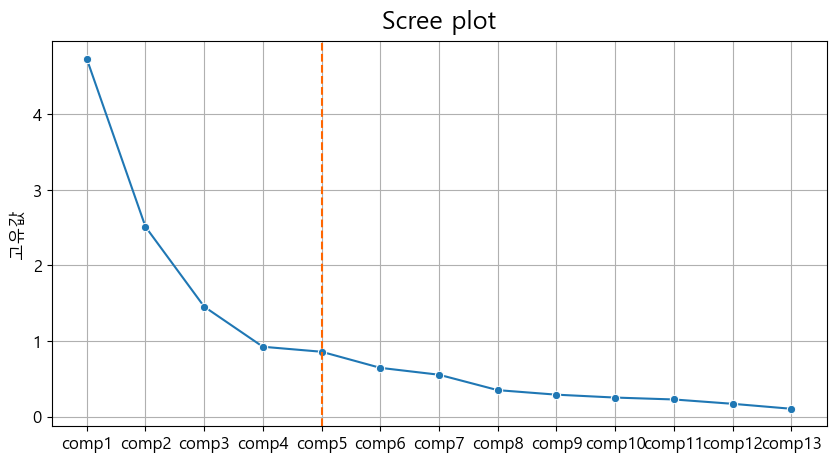

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# PCA 고유값 기여율로 Scree plot을 그렸을 때 기울기가 완만해지는 지점으로 주성분 개수 결정
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.lineplot(x=e_value.index, y='고유값', marker='o', data=e_value, ax=ax)
ax.grid()
ax.set_title('Scree plot', fontsize=18, pad=9)

for i, v in enumerate(e_value['누적기여율']):
    if v > 0.8:
        ax.axvline(e_value.index[i], ls='--', color='#ff6600')
        best_dim = i+1
        break

plt.show()

# 아래 그래프 상으로는 주성분 4개 수준으로 결정할 수 있다.

#### <a id='toc1_2_1_2_'></a>[PCA 기반의 차원축소](#toc0_)

In [4]:
# 최적 주성분개수를 5개로 결정. 주성분을 5개로 지정하여 PCA 적합
model = PCA(n_components=best_dim, svd_solver='auto')
model.fit(X_scale)
PCA_result = model.fit_transform(X_scale) 

e_vector = pd.DataFrame(model.components_, index=['comp%s'%i for i in range(1, best_dim+1)], columns=X_scale.columns)

# 각 특성은 추출된 주성분에 대해 각각 어떤 가중치를 갖게 되는가?
# 가중치의 절대값이 클수록 해당 주성분에 영향을 많이 준다고 본다.
e_vector

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
comp1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
comp2,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903
comp3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
comp4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
comp5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869


#### <a id='toc1_2_1_3_'></a>[biplot을 통한 결과 해석](#toc0_)

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


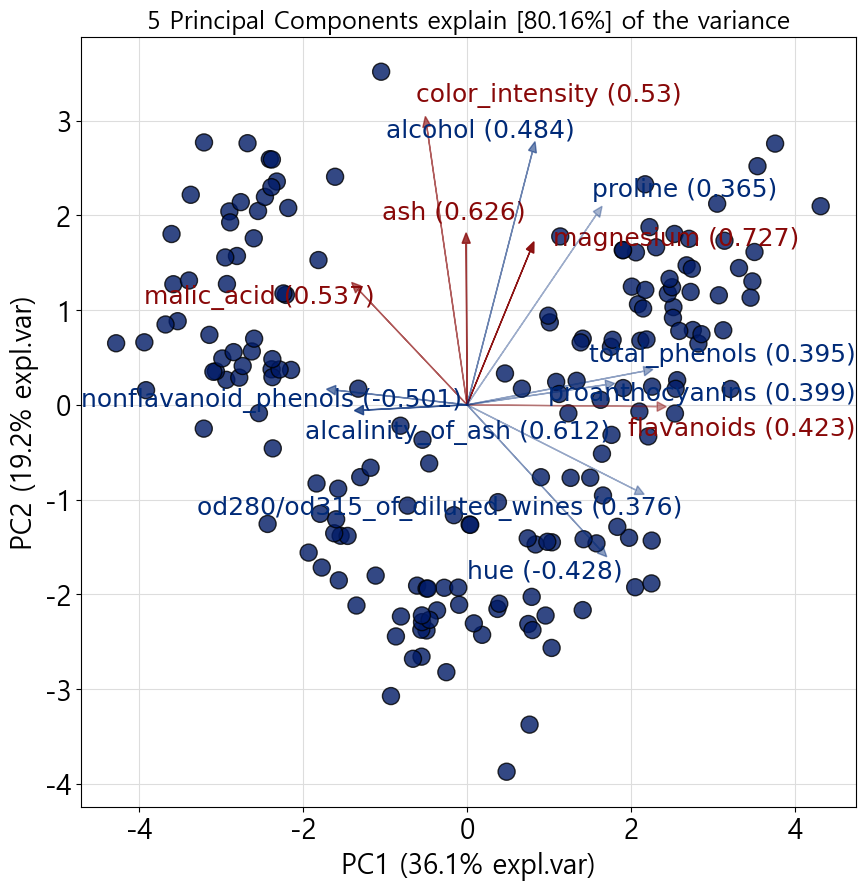

In [5]:
# 각 PC축에 평행을 이루는 변수가 해당 PC에 영향을 가장 많이 주는 변수
# 각 빨간 선의 길이는 원변수의 분산을 표현, 길이가 길수록 분산이 큰 것.
# 각 빨간 선이 서로 가까울수록 서로 상관관계가 있다.
from pca import pca

model = pca(n_components=5)
model.fit_transform(X_scale)

fig, ax = model.biplot(n_feat=X_scale.shape[1], legend=False, figsize=(10, 10))
plt.show()

### <a id='toc1_2_2_'></a>[FA (Factor analysis) : 요인분석](#toc0_)
- 주성분분석과 요인분석의 공통점
    - 변수축소 기능 
    - 데이터의 성질과 특징 탐색
    - 다중공선성의 처리되므로 회귀분석 용이
    - 차원축소 후 군집분석 시 속도 향상
    - 차원축소 후 시계열 분석 시 용이
- 주성분분석과의 차이점
    - PCA는 데이터의 분산을 가장 많이 설명하는 축/평면을 찾아내는 것임.
        - 따라서 도출된 순서대로 기여도(설명력)의 차이가 발생함.
        - 따라서 주성분의 개수는 누적 기여도에 따라 임의로 정함
        - 의미 불문, 분산이 설명력이 높은 축/평면을 찾은 것이므로 이름을 붙일 수 없음.
    - FA는 개념적/논리적으로 비슷한 특성들을 묶어 만드는 것임
        - 따라서 도출된 순서는 설명력과 상관이 없고, 우선순위도 없음.
        - 따라서 요인의 개수는 제한이 없고, 분석 과정에서 결정이 됨
        - 개념적/논리적 의도를 전제하므로 하위 변수들을 토대로 이름을 명명함.

In [6]:
from sklearn.decomposition import FactorAnalysis
best_dim = 5

model = FactorAnalysis(n_components=best_dim)
model.fit(X_scale)
FA_result = model.transform(X_scale)

#각 잠재요인의 feature별 최대 분산
max_var = pd.DataFrame(model.components_, index=['latent%s'%i for i in range(1, best_dim+1)], columns=load['feature_names'])
max_var

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
latent1,0.299731,-0.424489,0.143386,-0.387691,0.275096,0.883819,0.964917,-0.554122,0.657893,-0.154977,0.570742,0.803164,0.581277
latent2,-0.423886,-0.283977,-0.866066,-0.364116,-0.409356,-0.026124,0.044955,-0.214042,0.037284,-0.588489,0.307715,0.225350,-0.336065
latent3,-0.576480,-0.039512,0.368996,0.537425,-0.228729,-0.035148,0.047046,0.178719,-0.062089,-0.597359,0.251566,0.215893,-0.470360
latent4,-0.117865,-0.148264,-0.013634,-0.073661,0.668697,-0.107851,-0.077815,-0.172425,-0.011827,-0.248474,0.222003,0.003696,0.085419
latent5,-0.194167,0.157465,-0.071648,0.239827,0.209583,0.096661,0.060824,-0.130692,0.285620,0.158815,-0.329971,-0.049456,-0.317941


### <a id='toc1_2_3_'></a>[ICA (Independent component analysis) : 독립성분분석](#toc0_)
- 다변량의 신호를 최대한 독립적인 추가 하부 성분으로 분리하는 방법
- 차원을 줄이기 위한 용도가 아니라 중첩된 신호를 분리하는데 사용한다.
    - 예) 음원 분리. 예측되는 성분의 통계적 독립성을 최대화하도록 독립성분을 찾는다.
    - Infomax, FastICA, JADE 등 알고리즘 사용
- PCA에서는 주성분을 계속 직교하는 방식으로 추출해낸다. 하지만 ICA에서는 최대한 독립적인 축을 찾아낸다.

In [7]:
from sklearn.decomposition import FastICA
best_dim = 5
model = FastICA(n_components=best_dim, algorithm='parallel', whiten='arbitrary-variance', fun='logcosh')
model.fit(X_scale)
ICA_result = model.transform(X_scale)

# 독립 소소를 얻기 위해 데이터에 적용할 선형 연산자
ind_comp = pd.DataFrame(model.components_, index=['ind_comp%s'%i for i in range(1, best_dim+1)], columns=load['feature_names'])
ind_comp


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
ind_comp1,0.006442,-0.008053,-0.041629,-0.036655,-0.012424,-0.009293,-0.008730,-0.010367,-0.009303,0.001479,-0.001521,-0.007574,0.002977
ind_comp2,0.018917,0.006883,0.007555,-0.002861,-0.064338,0.015130,0.011271,0.036133,-0.003564,0.005760,0.006388,0.011703,0.006804
ind_comp3,0.026427,0.011649,0.002967,-0.010934,0.007011,0.002827,-0.000737,-0.001629,0.001814,0.026923,-0.015818,-0.008209,0.018178
ind_comp4,-0.008179,0.040534,-0.019079,0.006586,-0.013220,0.012463,0.010022,-0.025175,0.033224,0.001570,-0.034480,0.013073,-0.021701
ind_comp5,-0.004500,0.009787,-0.000763,0.007801,-0.003451,-0.013658,-0.014751,0.008658,-0.009900,0.004120,-0.011987,-0.013375,-0.009849


### <a id='toc1_2_4_'></a>[LSA (Latent semantic analysis = Truncated SVD)](#toc0_)

### <a id='toc1_2_5_'></a>[NMF (Non-negative matrix factorization) : 음수 미포함 행렬분해](#toc0_)

### <a id='toc1_2_6_'></a>[MDS (Multidimensionlal Scaling) : 다차원 척도법](#toc0_)

### <a id='toc1_2_7_'></a>[t-SNE (t-distributed Stochastic Neighbor Embedding)](#toc0_)

### <a id='toc1_2_8_'></a>[차원축소 모델 병 성능 비교](#toc0_)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data_list = [X_scale, PCA_result, FA_result, ICA_result]
title_list = ['original', 'PCA', 'FA', 'ICA']
y = load['target']

for X, title in zip(data_list, title_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    lr = LinearRegression().fit(X_train, y_train)
    train_score, test_score = lr.score(X_train, y_train), lr.score(X_test, y_test)
    print(title)
    print('train score: {:.3f}, test score: {:.3f}\n'.format(train_score, test_score))

original
train score: 0.890, test score: 0.915

PCA
train score: 0.827, test score: 0.828

FA
train score: 0.877, test score: 0.880

ICA
train score: 0.827, test score: 0.828



# <a id='toc2_'></a>[군집분석](#toc0_)
- 거리기반 모델링 기법
    - 데이터 표준화 필수
    - 이상치에 민감하므로 필요 시 제거나 조정해야 함.
    - 모든 설명변수를 써서 거리 계산하므로 중요하지 않은 변수가 있으면 정확도가 낮아짐.
- 군집화 성능 척도
    - supervised 방식
        - Homogeneity
            - 각 클러스터의 모든 데이터들이 동일한 클래스로부터 온 것일 때 동질성을 가짐
            - 이 경우의 문제는 클러스터의 동질성은 100이어도, 그 것이 특정 클래스의 극히 일부일 뿐일 수가 있다는 것.
            - 0~1, 클수록 좋다.
        - Completeness
            - 각 클래스의 모든 객체들이 동일한 클러스터의 멤버가 될 때 완전성을 가짐.
            - 이 경우의 문제는 클러스터에 잡음이 많이 끼어도 특정 클래스의 완전성은 100이 될 수 있다는 것
            - 0~1, 클수록 좋다.
        - V-measure
            - Homogeneity와 Completeness의 조화 평균
    - unsupervised 방식
        - intertia
            - 각 데이터에 대해, 해당 데이터와 가장 가까운 클러스터와의 거리제곱의 평균
            - 클러스터링이 잘 될 수록 이 값을 작아지므로, 이 값을 기준으로 적절한 클러스터 수 결정 (Elbow)
        - Silhouette
            - 각 데이터에 대해, 같은 클래스에 속한 다른 데이터들과의 거리, 다른 클래스에 속한 데이터들과의 거리를 측정.
            - 음수이면 클러스터가 잘못되었다는 의미이고 1에 가까우면 다른 군집 간 경계가 명확하다는 의미


## <a id='toc2_1_'></a>[계층적 군집분석](#toc0_)

### <a id='toc2_1_1_'></a>[합병형](#toc0_)
- 군집간 거리 척도 (Linkage method)
    - 최단 연결법
    - 평균 연결법
    - Ward 연결법
    - 완전 연결법
    - 중심 연결법

In [33]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

X = load_iris()['data']
y = load_iris()['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ","_"), load_iris()['feature_names']))


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(X), columns=columns)

# link method : single, complete, average, weighted, centroid, median, ward
# Z는 4열 matrix. 0/1 열은 인덱스, 2열은 0/1열 인덱스 쌍의 거리, 3열은 클러스터 내 관찰값의 개수
Z = linkage(df, method="complete")
print(Z[-10:, :].round())

[[267. 283.   2.  29.]
 [277. 280.   2.  42.]
 [285. 289.   2.  44.]
 [282. 291.   3.  66.]
 [275. 286.   3.  11.]
 [287. 288.   3.  24.]
 [281. 290.   4.  49.]
 [292. 293.   4.  77.]
 [294. 295.   6.  73.]
 [296. 297.   7. 150.]]


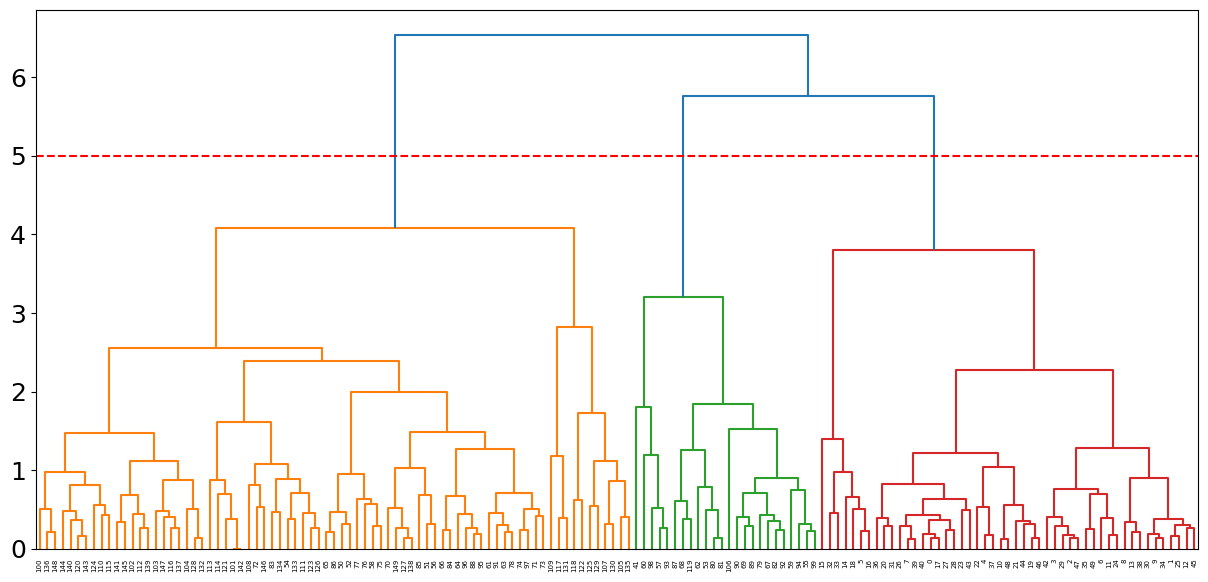

In [10]:
#군집화 결과 시각화
distance_setting = 5

from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))

# color_threshold : 거리값을 기준으로 색상이 다른 군집들을 나눠줌
dendrogram(Z, labels=list(df.index), color_threshold=distance_setting)
plt.xticks(rotation=90)
ax.axhline(y=distance_setting, linestyle='dashed', color='red')
plt.show()

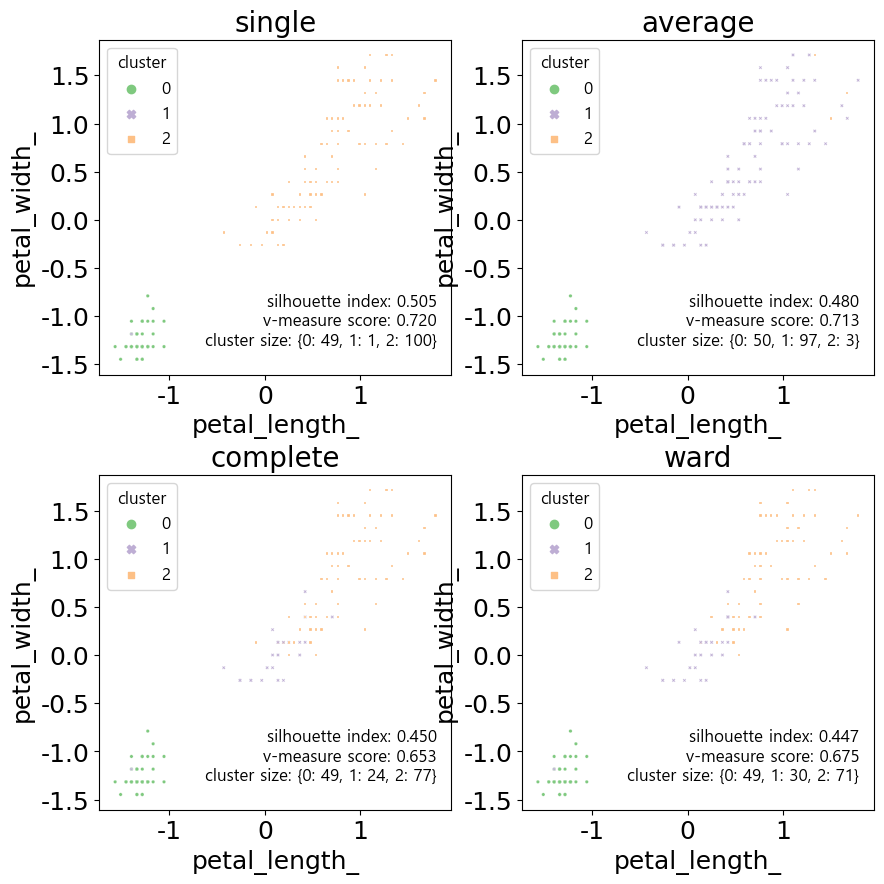

In [11]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

from pandas import merge
from collections import Counter
import seaborn as sns 
from sklearn.metrics import silhouette_score, v_measure_score

fig, axes = plt.subplots(2,2, figsize=(10,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.subplots_adjust(hspace=0.3)

methods = ['single', 'average', 'complete', 'ward']

for ax, method in zip(axes.ravel(), methods):
    Z = linkage(df, method=method)
    cluster = pd.DataFrame({'cluster':cut_tree(Z,3).flatten()})
    ddf = merge(df, cluster, left_index=True, right_index=True)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=ddf, hue='cluster',style='cluster', s=6, ax=ax, palette='Accent')
    ax.text(1.8, -0.9, 'silhouette index: %.3f' %silhouette_score(df, ddf['cluster']), horizontalalignment='right')
    ax.text(1.8, -1.1, 'v-measure score: %.3f' %v_measure_score(load_iris()['target'], ddf['cluster']), horizontalalignment='right')
    cluster_size = dict(Counter(ddf['cluster']))
    ax.text(1.8, -1.3, 'cluster size: {}'.format(cluster_size), horizontalalignment='right')
    ax.set_title(method, fontsize=20)
plt.show()

# 비지도 학습이므로 평가점수 자체는 clustering의 정확도와 의미가 다르다.
# 평가점수로 보면 single이 가장 높지만, 군집화의 정확도로 보면, complete이나 ward가 더 높다.


### <a id='toc2_1_2_'></a>[분리형](#toc0_)
- Divisive Analysis. DIANA method

## <a id='toc2_2_'></a>[분할형(비계층적) 군집분석](#toc0_)

### <a id='toc2_2_1_'></a>[프로토타입](#toc0_)
- 연속형 데이터 : K-means/K-median clustering
- 범주형 데이터 : K-medoid/K-mode clustering

#### <a id='toc2_2_1_1_'></a>[K-means clustering](#toc0_)
- 절차
    1. 중심점의 개수를 정한다. (Hyper-parameter)
    2. 중심점의 위치를 정한다. (Random)
    3. 모든 데이터에 대해 각 중심점으로부터 거리를 구해, 가장 가까운 중심점에 귀속시키는 방식으로 클러스터를 만든다.
    4. 각 클러스터의 중심을 구해, 그것을 새로운 중심점으로 삼는다.
    5. 중심점의 위치가 변하지 않을 때 까지 3, 4 단계를 반복한다. --> 평균의 오차제곱합이 최소가 되도록 함.
    6. 단계 2에서 중심점에 따라 결과가 크게 달라지는 것이 문제. 2~5 단계를 여러 번 반복하여 최적의 결과를 선택한다.
- 군집 개수 k를 정하는 방법
    - 엘보우 방법. 오차제곱합이 평평해지기 시작하는 지점으로 k를 정한다.
    - scikit-learn KMeans의 .intertia_가 거리제곱합 값이므로 활용한다.
- 장단점
    - 구현이 쉽고 속도도 빠르고 대용량 데이터셋에서도 잘 작동한다.
    - 다만, 초기값에 개수와 위치에 따라 다른 결과가 나타나는 것이 단점.
    - 평균값을 사용하기 떄문에 이상치에 민감하다.

In [12]:
# K-Means clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']

#특성이름 단순화
columns = list(map(lambda x: x.replace("(cm)", "").rstrip().replace(" ","_"), load['feature_names']))

#데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(X), columns=columns)

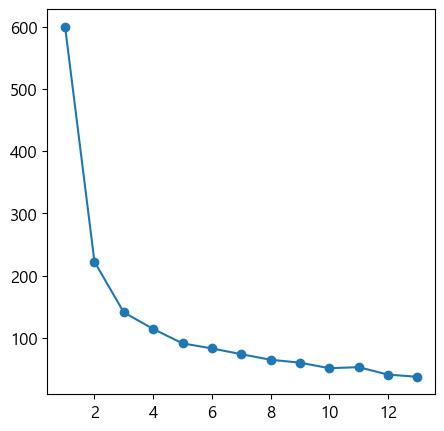

In [13]:
#적정한 군집개수 정하기
I = []  #오차제곱합
for k in range(1, 14):
    kmeans = KMeans(n_init='auto', n_clusters=k).fit(df)
    I.append(kmeans.inertia_)

plt.plot(list(range(1,14)), I, marker='o')



각 데이터의 군집화 결과:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


클러스터의 중심 위치:
          sepal_length  sepal_width  petal_length  petal_width
cluster0     -0.050220    -0.883376      0.347738     0.281527
cluster1     -1.014579     0.853263     -1.304987    -1.254893
cluster2      1.135970     0.088422      0.996155     1.017526


silhouette score : 0.460
completeness score : 0.660


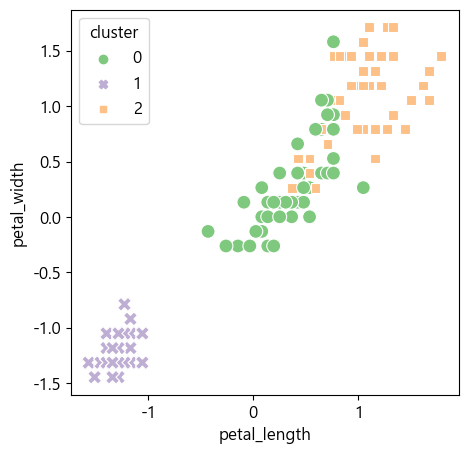

In [14]:
# 엘보우 기법으로 정한 군집의 개수를 기반으로 각 데이터의 군집을 반환
n_cluster = 3
model = KMeans(n_init='auto', n_clusters=n_cluster, random_state=0)
distances = model.fit_transform(df) #해당 열 데이터의 각 cluster center와의 거리.
kmeans_result = model.labels_ #각 데이터의 군집 반환
print('\n\n각 데이터의 군집화 결과:\n{}'.format(kmeans_result))

# 각 군집의 위치정보를 확인
centers = pd.DataFrame(model.cluster_centers_, columns=df.columns, index=['cluster%s' %i for i in range(n_cluster)])
print('\n\n클러스터의 중심 위치:\n{}'.format(centers))

#타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print('\n\nsilhouette score : %.3f' %silhouette_score(df, kmeans_result))
print('completeness score : %.3f' %completeness_score(y, kmeans_result))

#군집 결과 시각화
df['cluster'] = kmeans_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='cluster', style='cluster', s=100, palette='Accent')
plt.show()

### <a id='toc2_2_2_'></a>[분포기반](#toc0_)
- 혼합분포군집 (Mixture distribution clustering)
    - 데이터를 여러 개의 정규분포의 합, 즉 다변량 정규분포라고 가정한다.
    - 각기 다른 어떤 모양의 정규분포가 몇 개나 모여있다고 판단할 것인지가 분석자의 역량이 된다.

### <a id='toc2_2_3_'></a>[밀도기반](#toc0_)
- DBSCAN, OPTICS, DENCLUE 등

#### <a id='toc2_2_3_1_'></a>[DBSCAN](#toc0_)
- 특징
    - Dense region이 하나의 군집을 형성. 비교적 빈 region을 경계로 다른 군집과 구분. 
    - Dense region을 데이터를 핵심 데이터, 빈 region은 경계 데이터, 그 외 잡음 데이터로 구분한다.
    - 군집화 반복 시 핵심/잡음데이터는 그대로이지만, 경계 데이터는 하나의 군집으로 잡힐 수 있다.
- 군집개수 k를 정하는 방법
    - eps 거리 내의 데이터 개수가 min_samples 이상 되면 이 데이터들을 핵심데이터로 보고 군집화
    - eps는 클러스터의 개수를 결정
    - min_samples는 클러스터의 최소 크기를 제어
- 장단점
    - 비선형 등 복잡한 형상도 찾을 수 있고, 잡음 데이터 식별이 가능
    - 병합이나 K-Means보다 다소 느리다.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, completeness_score
from sklearn.preprocessing import StandardScaler
from collections import Counter

iris = load_iris()
X = iris['data']
y = iris['target']

columns = list(map(lambda x: x.replace('(cm)', '').rstrip().replace(' ', '_'), iris.feature_names))

ss = StandardScaler()
df = pd.DataFrame(data=ss.fit_transform(X), columns=columns)

적정한 eps 정하기:


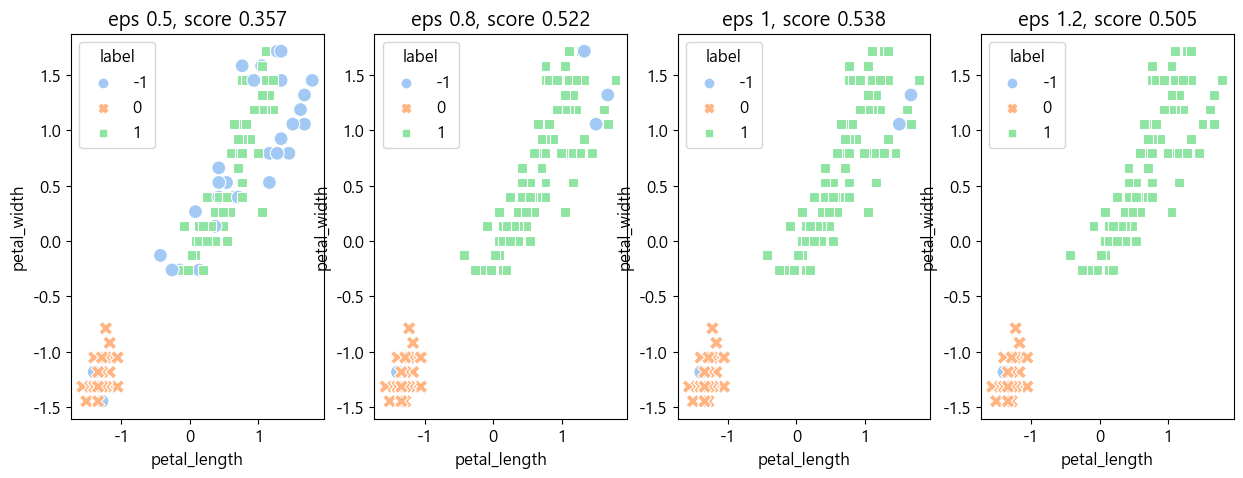

In [16]:
# 적정한 eps 정하기
print('적정한 eps 정하기:')
eps_list =[0.5, 0.8, 1, 1.2]
plt.rcParams['font.size']=12

fig, axes = plt.subplots(1,4, figsize=(15,5))
for ax, eps in zip(axes, eps_list):
    db = DBSCAN(eps=eps, min_samples=5).fit(df)
    temp_df = df.copy()
    temp_df['label']=db.labels_
    sns.scatterplot(x='petal_length', y='petal_width', data=temp_df, ax=ax, hue='label', style='label', s=100, palette='pastel')
    score=silhouette_score(df, db.labels_)
    ax.set_title('eps {}, score {:.3f}'.format(eps, score) )
    
plt.show()



각 데이터의 군집화 결과:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


클러스터의 구성:
 Counter({1: 97, 0: 49, -1: 4})
핵심데이터 인덱스:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37
  38  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  58  59  61  62  63  64  65  66  67  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  86  88  89  90  91  92  94  95  96  97  98
  99 100 101 102 103 104 107 110 111 112 113 114 115 116 120 121 123 124
 125 126 127 128 129 130 132 13

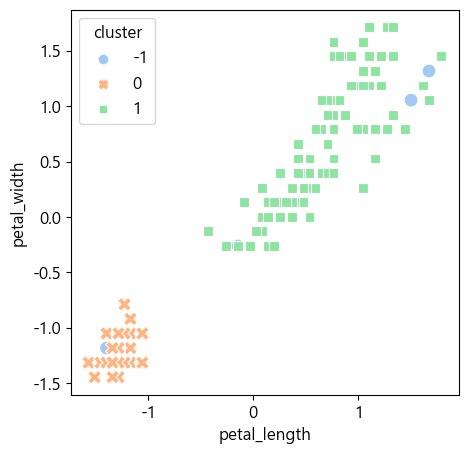

In [17]:
# 확정한 eps 기반으로 각 데이터의 군집 반환
eps = 1
model = DBSCAN(eps=eps, min_samples=10).fit(df)
db_result = model.labels_   #각 데이터의 군집을 반환
print('\n\n각 데이터의 군집화 결과:\n{}'.format(db_result))


# 군집 정보 확인
print('\n\n클러스터의 구성:\n', Counter(model.labels_))
print('핵심데이터 인덱스: ', model.core_sample_indices_)

# 타당성 평가
print('\n\nsilhouette score : %.3f' %silhouette_score(df, db_result))
print('completeness score : %.3f' %completeness_score(y, db_result))


# 군집결과 시각화
df['cluster'] = db_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='pastel')
plt.show()

### <a id='toc2_2_4_'></a>[격자 기반](#toc0_)
- STING, WaveCluster, CLIQUE

## <a id='toc2_3_'></a>[혼합분포 군집](#toc0_)

- 평가지표
    - Mixture of Gaussian 평가지표인 아래 값들이 가장 작은 클러스터수를 택한다.
        - AIC (Akaike Information Criterion)
        - BIC (Bayesian Information Criterion)

## <a id='toc2_4_'></a>[자기조직화 지도 (SOM, Self Organizing Map)](#toc0_)
- 특징
    - 인공신경망 알고리즘 응용. 경쟁학습 알고리즘
    - 보통 2D 맵, 즉 SOM을 생성한다. SOM의 각 유닛이 뉴런이 된다.
    - 각 데이터의 feature들은 뉴런에 대한 완전연결되며, weight값과 유닛 위치를 업데이트하면서 군집을 결정한다.
- 군집개수 k를 정하는 방법
    - 2D SOM을 만드는데, m이 세로크기 n이 가로크기를 지정. 최초 m*n의 클러스터로 시작한다.
- 장단점
    - 입력 데이터 사이의 위상을 잘 나타낸다. 
    - 따라서 잘 구별되지 않는 데이터 간 상관관계를 찾아낼 가능성도 있다.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, completeness_score
from sklearn_som.som import SOM
from collections import Counter

iris = load_iris()
X = iris['data']
y = iris['target']

columns = list(map(lambda x: x.replace('(cm)', '').rstrip().replace(' ', '_'), iris['feature_names']))
ss = StandardScaler()
df = pd.DataFrame(data=ss.fit_transform(X), columns=columns)

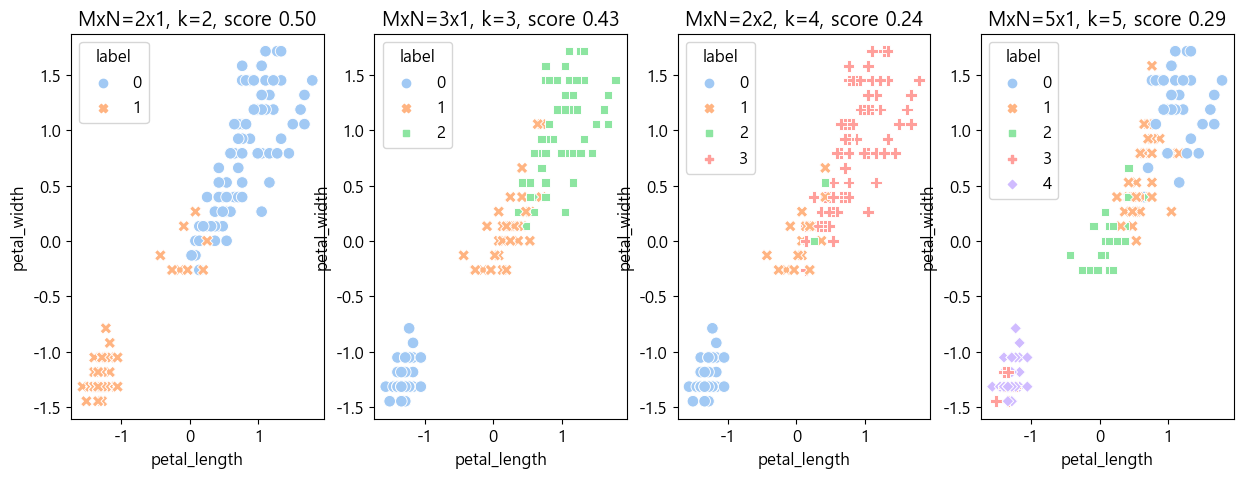

In [19]:
#적정한 네트워크의 크기 구하기
mn_list=[(2,1),(3,1),(2,2),(5,1)]
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for ax, (M,N) in zip(axes, mn_list):
    som = SOM(m=M, n=N, dim=df.shape[1])    #dim은 입력 데이터의 feature 개수
    som.fit(df.values)                      #배열을 입력해야 함. df는 안됨
    labels = som.predict(df.values)
    clusterNo = len(Counter(labels))
    temp_df = df.copy()
    temp_df['label'] = som.predict(df.values)
    sns.scatterplot(x='petal_length', y='petal_width', data=temp_df, hue='label', style='label', s=70, ax=ax, palette='pastel')
    score=silhouette_score(df, temp_df['label'])
    ax.set_title('MxN={}x{}, k={}, score {:.2f}'.format(M,N,clusterNo,score))
plt.show()

군집화 결과 : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1
 1 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
클러스터 구성 : Counter({2: 61, 0: 50, 1: 39})
SOM map : 
 [[1.0307927  2.71228677 3.64647212]
 [1.14592483 2.4520158  3.52622073]
 [1.15047148 2.69044008 3.74503526]
 [1.22530858 2.64123115 3.71956293]
 [1.19851448 2.87800248 3.79120315]]
Silhouette score: 0.426
completeness_score: 0.747


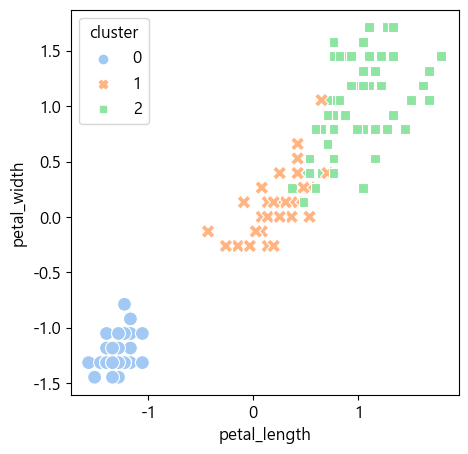

In [20]:
# 확정한 k를 기반으로 각 데이터의 군집을 반환
M, N = (3, 1)
model = SOM(m=M, n=N, dim=df.shape[1])
model.fit(df.values)
labels = model.predict(df.values)
som_result = labels
print('군집화 결과 : \n{}'.format(som_result))

# 군집정보 확인
SOMmap = model.transform(df.values)
print('클러스터 구성 : {}'.format(Counter(labels)))
print('SOM map : \n', SOMmap[:5])   #앞 4개의 데이터 확인

# 타당성 평가
print('Silhouette score: %.3f' %silhouette_score(df, labels))
print('completeness_score: %.3f' %completeness_score(y, labels))

# 군집화결과 시각화
df['cluster'] = som_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='pastel')
plt.show()


# <a id='toc3_'></a>[연관규칙 학습](#toc0_)

#### <a id='toc3_1_1_1_'></a>[연관규칙 학습의 측도](#toc0_)
A는 조건(Antecedent), C는 결과(Consequence)를 의미한다.
- 지지도 (Support)
    - support(A->C) = P(A U C)
    - A와 C가 동시에 포함된 거래수 / 전체 거래수
- 신뢰도 (Confidence)
    - confidence(A->C) = P(C | A)
    - A와 C가 동시에 포함된 거래수 / A가 포함된 거래수
- 향상도 (Lift)
    - lift(A->C) = P(C | A) / P(C)
    - (A와 C가 동시에 포함된 거래수 * 전체 거래수) / (A가 포함된 거래수 * C가 포함된 거래수)
    - A 없이 C만 구매한 확률에 비해, A와 C를 함께 구매한 확률의 비
    - 향상도가 1 이하라면 서로 무관하다고 본다.
- 레버리지 (Leverage)
    - leverage(A->C) = support(A->C) - support(A) X support(C)
- 확신 (Conviction)
    - conviction(A->C) = (1-support(C)) / (1-confidence(A->C))

#### <a id='toc3_1_1_2_'></a>[연관규칙 학습 알고리즘](#toc0_)
- Apriori
    - 모든 품목집합에 대해 연관규칙을 찾지 않고, 최소 지지도 이상의 품목집합을 찾고 그 것들에 대해서만 연관규칙 계산
- FP-Growth
    - 빈발항목 집합을 FP-Tree를 써서 더 빠르게 찾아내는 방식 

In [21]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder    # 트랜잭션 부호화
from mlxtend.frequent_patterns import apriori, fpgrowth # 빈발집합 추출
from mlxtend.frequent_patterns import association_rules # 연관규칙 생성

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_).applymap(lambda x: 1 if x else 0)
df

C:\Users\lsel\AppData\Local\Temp\ipykernel_23240\415836193.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = pd.DataFrame(te_ary, columns=te.columns_).applymap(lambda x: 1 if x else 0)


,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,0,0,0,1,0,1,1,1,1,0,1
1,0,0,1,1,0,1,0,1,1,0,1
2,1,0,0,1,0,1,1,0,0,0,0
3,0,1,0,0,0,1,1,0,0,1,1
4,0,1,0,1,1,1,0,0,1,0,0


In [22]:
# apriori 알고리즘 기반

# 빈발집합 추출
fset = apriori(df, min_support=0.6, use_colnames=True, verbose=0)
print('빈발집합 추출\n {}'.format( fset.sort_values(by='support', ascending=False) ))

# 연관규칙 생성 ('support', 'confidence', 'lift', 'leverage', 'conviction')
rule = association_rules(fset, metric='confidence', min_threshold=0.7)
rule['len_ant'] = rule['antecedents'].apply(lambda x:len(x))
rule['len_con'] = rule['consequents'].apply(lambda x:len(x))

# consequents 항목이 1이고, lift가 1.2이상인 rule만 확인
print('\n\n연관규칙\n {}'.format( rule[(rule['len_con']==1) & (rule['lift']>1.2)]) )

빈발집합 추출
     support                     itemsets
1       1.0               (Kidney Beans)
0       0.8                       (Eggs)
5       0.8         (Eggs, Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
6       0.6                (Eggs, Onion)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Eggs, Onion, Kidney Beans)


연관규칙
              antecedents consequents  antecedent support  consequent support  \
2                 (Eggs)     (Onion)                 0.8                 0.6   
3                (Onion)      (Eggs)                 0.6                 0.8   
8   (Eggs, Kidney Beans)     (Onion)                 0.8                 0.6   
9  (Onion, Kidney Beans)      (Eggs)                 0.6                 0.8   

   support  confidence  lift  leverage  conviction  zhangs_metric  len_ant  \
2      0.6  

c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [23]:
# fp-growth 알고리즘 기반

# 빈발집합 추출
fset = fpgrowth(df, min_support=0.6, use_colnames=True, verbose=0)
print('빈발집합 추출\n {}'.format( fset.sort_values(by='support', ascending=False) ))

# 연관규칙 생성 ('support', 'confidence', 'lift', 'leverage', 'conviction')
rule = association_rules(fset, metric='confidence', min_threshold=0.7)
rule['len_ant'] = rule['antecedents'].apply(lambda x:len(x))
rule['len_con'] = rule['consequents'].apply(lambda x:len(x))

# consequents 항목이 1이고, lift가 1.2이상인 rule만 확인
print('\n\n연관규칙\n {}'.format( rule[(rule['len_con']==1) & (rule['lift']>1.2)]) )

# lift 1.25인 규칙들은 Eggs를 사는 사람들은 (Kidney Beans, Onion)을 살 확률이 다소 높다는 의미다.
# leverage 0.12인 규칙들의 경우 0에 가깝기 때문에 연관이 크지 않다.
# conviction 값들은 1 이상이기 때문에 어느 정도 C 항목 예측에 유용하다고 볼 수 있다.

빈발집합 추출
     support                     itemsets
0       1.0               (Kidney Beans)
1       0.8                       (Eggs)
5       0.8         (Eggs, Kidney Beans)
2       0.6                     (Yogurt)
3       0.6                      (Onion)
4       0.6                       (Milk)
6       0.6       (Yogurt, Kidney Beans)
7       0.6                (Eggs, Onion)
8       0.6        (Onion, Kidney Beans)
9       0.6  (Eggs, Onion, Kidney Beans)
10      0.6         (Milk, Kidney Beans)


연관규칙
              antecedents consequents  antecedent support  consequent support  \
3                 (Eggs)     (Onion)                 0.8                 0.6   
4                (Onion)      (Eggs)                 0.6                 0.8   
7   (Eggs, Kidney Beans)     (Onion)                 0.8                 0.6   
8  (Onion, Kidney Beans)      (Eggs)                 0.6                 0.8   

   support  confidence  lift  leverage  conviction  zhangs_metric  len_ant  \
3      0.6  

c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [24]:
rule[(rule['len_con']==1) & (rule['lift']>1.2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,len_ant,len_con
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0,1,1
4,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5,1,1
7,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0,2,1
8,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5,2,1


# 연습문제

### 1. 
- 신용카드 사용자 데이터. 2개의 군집분석 알고리즘으로 각각 군집을 생성하고, 군집생성 과정을 설명하시오.
    - CUST_ID : 신용카드 사용자ID
    - BALANCE : 구매계좌 잔액
    - BALANCE_FREQUENCY : 구매계좌 잔액이 업데이트되는 빈도지수
    - PURCHASES : 구매계좌로부터의 구매액
    - PURCHASES_FREQUENCY : 구매빈도 지수
    - PURCHASES_TRX : 구매거래 건수

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, completeness_score
from collections import Counter

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/refs/heads/main/practice10_credit_card.csv')
print(df.columns)

sc = StandardScaler()
scaled = sc.fit_transform(df.drop(['CUST_ID'], axis=1))

cols = df.columns.tolist()
cols.remove('CUST_ID')
df = pd.DataFrame(scaled, columns=cols)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'PURCHASES_FREQUENCY', 'PURCHASES_TRX'],
      dtype='object')


In [2]:
# ---------------------------------------------------------------
# 계층적(병합형) 방식 : Linkage (complete)
# ---------------------------------------------------------------
# 장점
    # 사전에 군집 개수를 지정할 필요가 없음.
    # 분석 후 덴드로그램 통해 적절한 그룹개수를 정하기만 하면 됨.
# 단점
    # 한번 병합되면 클러스터가 바뀔 수 없음.
    # 거리 계산 방식에 따라 노이즈와 이상치에 취약
    # 복잡한 군집을 다루지 못함.
    # 상대적으로 비용이 더 큼
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

z = linkage(df, method='complete')

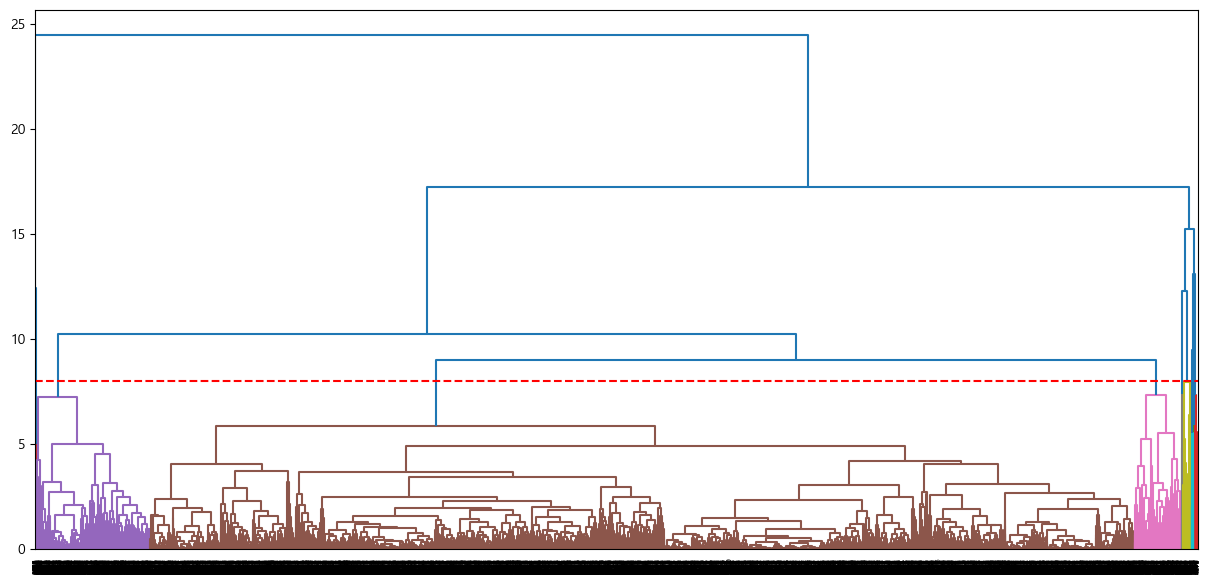

In [42]:
distance_setting = 8

fig, ax = plt.subplots(figsize=(15, 7))
dendrogram(z, labels=list(df.index), color_threshold=distance_setting)
plt.xticks(rotation=90)
ax.axhline(y=distance_setting, linestyle='dashed', color='red')
plt.show()

In [5]:
n_clusters = 4
H_clustering_result = cut_tree(z, n_clusters).flatten()

unique_values, counts = np.unique(H_clustering_result, return_counts=True)
result_df = pd.DataFrame(counts, index=unique_values)
print(result_df)
print('실루엣 계수 {:.3f}'.format(silhouette_score(df, H_clustering_result)))

      0
0  8822
1    76
2    45
3     7
실루엣 계수 0.663


In [4]:
# ---------------------------------------------------------------
# 비계층적(분할형) 방식 : 프로토타입 기반 : K-means 
# ---------------------------------------------------------------
# 장점
    # 가장 빠르고,
    # 이해가 쉽고 구현이 쉽다.
    # 대용량 데이터셋에서도 잘 작동한다.
# 단점
    # 클러스터 means 초기값에 따라 다른 결과를 얻게 된다.
    # 클러스터의 모양을 가정하고 있기 떄문에 활용범위가 제한적
    # mean을 구하는 방식은 이상치에 민감하다. 이 때문에 median을 사용하기도 한다.
from sklearn.cluster import KMeans

I = []
for k in range(1,14):
    kmeans = KMeans(n_clusters=k).fit(df)
    I.append(kmeans.inertia_)

plt.plot(list(range(1,14)), I, marker='o')

n_cluster = 4
plt.scatter(n_cluster, I[n_cluster-1], color='red', alpha=0.5, s=100)
plt.xticks(list(range(1, 14)), list (range(1, 14)))
plt.xlabel('Cluster 개수 : k')
plt.ylabel('클러스터 중심과 데이터들의 오차제곱합:inertia_')
plt.show()

NameError: name 'df' is not defined

In [12]:
model = KMeans(n_clusters=n_cluster, random_state=0)
distances = model.fit_transform(df)
kmeans_result = model.labels_
print(Counter(kmeans_result))
print('실루엣 계수 {:.3f}'.format(silhouette_score(df, kmeans_result)))

Counter({1: 3581, 3: 3477, 2: 1481, 0: 411})
실루엣 계수 0.422


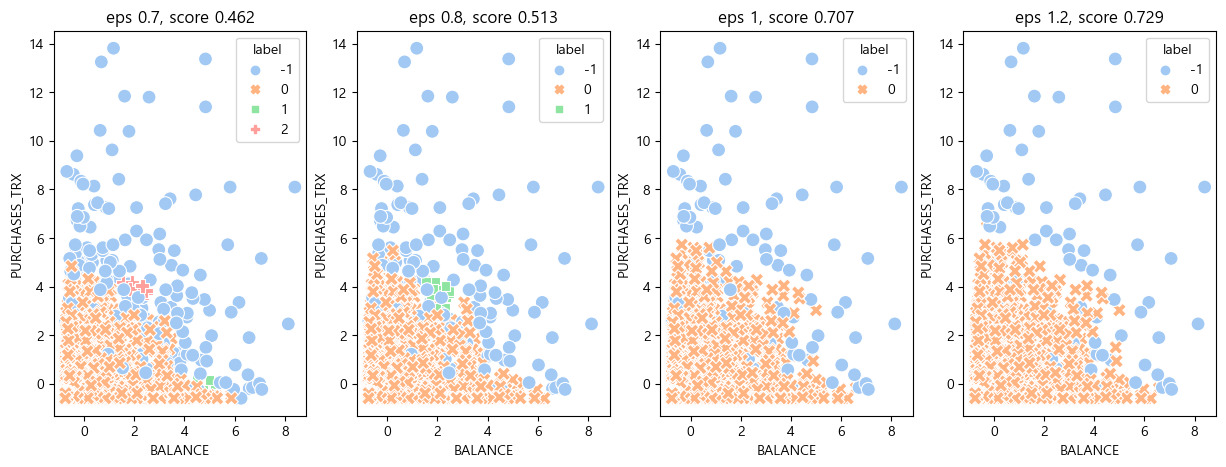

In [20]:
# ---------------------------------------------------------------
# 비계층적(분할형) 방식 : 밀도 기반 : DBSCAN 
# ---------------------------------------------------------------
#장점
    # 데이터의 밀집 정도를 이용하여 클러스터를 구분하며, eps값은 클러스터의 개수에 대한 결정 요인이며, min_samples는 클러스터의 크기에 대한 결정요인이다.
    # 비선형과 같은 복잡한 형상 찾을 수 있고
    # 어떤 클래스에도 속하지 않는 노이즈 데이터 구분 가능 (노이즈 샘플은 그룹 label -1)
#단점
    # 밀도가 높은 곳에 집중하는 방식으로 인해, 밀도가 낮은 곳은 하나의 군집으로 인식하지 않을 수 있는 문제
    # 병합방식이나 kmeans보다 다소 느리다.
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_list=[0.7, 0.8, 1, 1.2]
fig, axes = plt.subplots(1, 4, figsize=(15,5))

for ax, eps in zip(axes, eps_list):
    db = DBSCAN(eps=eps, min_samples=7).fit(df)
    temp_df = df.copy()
    temp_df['label']=db.labels_
    sns.scatterplot(x='BALANCE', y='PURCHASES_TRX', data=temp_df, hue='label', style='label', s=100, ax=ax, palette='pastel')
    score = silhouette_score(df, db.labels_)
    ax.set_title('eps {}, score {:.3f}'.format(eps, score))
plt.show()

In [22]:
from collections import Counter

eps = 0.7
min_samples = 7

model = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
db_result = model.labels_
print('클러스터 구성 : ', Counter(model.labels_))   #-1 클러스터가 노이즈
print('핵심데이터 인덱스: ', model.core_sample_indices_)
print('실루엣 계수 {:.3f}'.format(silhouette_score(df, db_result)))

클러스터 구성 :  Counter({0: 8688, -1: 247, 1: 8, 2: 7})
핵심데이터 인덱스:  [   0    1    2 ... 8947 8948 8949]
실루엣 계수 0.462


### 2. 
- 세 모델을 비교하고, 더 타당한 모델을 선택하시오,

In [2]:
"""
실루엣 계수는 군집화의 결과를 평가하는 지표로, 그룹간 거리가 멀면 1, 가까울수록 0이 되며 음수가 될 경우 클러스터가 잘못 생성되었음을 의미한다.
계층적 방식의 경우 실루엣 계수가 0.663, K-Means는 0.442, DBSCAN은 0.462로 계층적 방식의 경우 가장 클러스터 생성이 잘 되었다고 볼 수 있다.
또한 클러스터링 결과도 8822, 76, 45, 7로 적절히 그룹화된 것으로 보여진다.
"""

'\n실루엣 계수는 군집화의 결과를 평가하는 지표로, 그룹간 거리가 멀면 1, 가까울수록 0이 되며 음수가 될 경우 클러스터가 잘못 생성되었음을 의미한다.\n계층적 방식의 경우 실루엣 계수가 0.663, K-Means는 0.442, DBSCAN은 0.462로 계층적 방식의 경우 가장 클러스터 생성이 잘 되었다고 볼 수 있다.\n또한 클러스터링 결과도 8822, 76, 45, 7로 적절히 그룹화된 것으로 보여진다.\n'

### 3. 
- 선택한 모델로 생성한 군집들의 고객 특성을 분석하시오.

In [13]:
n_cluster = 4

model = KMeans(n_clusters=n_cluster, random_state=0)
distances = model.fit_transform(df)
kmeans_result = model.labels_

print(Counter(kmeans_result))
print('실루엣 계수 {:.3f}'.format(silhouette_score(df, kmeans_result)))

Counter({1: 3581, 3: 3477, 2: 1481, 0: 411})
실루엣 계수 0.422


In [22]:
df_kmeans = df.copy()
df_kmeans['cluster'] = kmeans_result


# cluster-0 : 잔고 평균이 1로 높고 구매금액도 3.0으로 높으며 실구매 트랜잭션도 3.0으로 높다.
# cluster-1 : 잔고 평균이 0이며, 구매금액도 0.0으로 낮으며 실구매 트랜잭션도 0으로 낮다.
# cluster-2 : 잔고 평균이 -1이며, 구매금액도 0으로 낮으며 실구매 트랜잭션도 0으로 낮다. 잔고 입출금도 -2로 매우 낮다.
# cluster-3 : 잔고 평균이 0이며, 구매금액도 0으로 낮으며 실구매 트랜잭션도 0으로 낮다. 잔고 입출금은 반면 0 정도이다.
print(df_kmeans[df_kmeans.cluster==0].describe().round())
print(df_kmeans[df_kmeans.cluster==1].describe().round())
print(df_kmeans[df_kmeans.cluster==2].describe().round())
print(df_kmeans[df_kmeans.cluster==3].describe().round())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count    411.0              411.0      411.0                411.0   
mean       1.0                0.0        3.0                  1.0   
std        2.0                0.0        3.0                  0.0   
min       -1.0               -3.0       -0.0                 -1.0   
25%       -0.0                1.0        1.0                  1.0   
50%        1.0                1.0        2.0                  1.0   
75%        2.0                1.0        4.0                  1.0   
max        8.0                1.0       22.0                  1.0   

       PURCHASES_TRX  cluster  
count          411.0    411.0  
mean             3.0      0.0  
std              2.0      0.0  
min             -0.0      0.0  
25%              2.0      0.0  
50%              3.0      0.0  
75%              4.0      0.0  
max             14.0      0.0  
       BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count   3581.0       

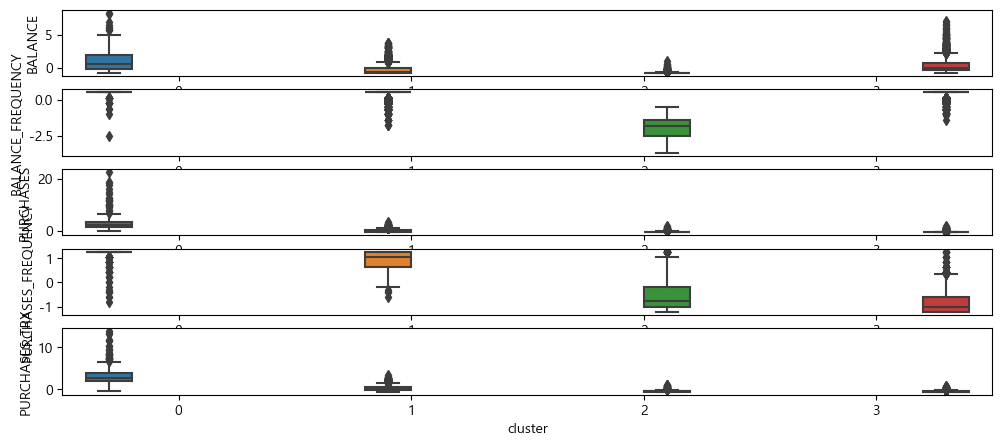

In [26]:
import seaborn as sns
fig, axes = plt.subplots(5, 1)
for ax, col in zip(axes, ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_TRX']):
    sns.boxplot(x='cluster', y=col, hue='cluster', data=df_kmeans, ax=ax)
    ax.legend().remove()

plt.show()

### 3. 
- 고객 특성이 다음과 같다면 어느 군집으로 분류하는 것이 타당한지 서술하시오.
    - 'BALANCE' : 3000
    - 'BALANCE_FREQUENCY' : 1
    - 'PURCHASES' : 6000
    - 'PURCHASES_FREQUENCY' : 1
    - 'PURCHASES_TRX' : 100

In [28]:
model.predict(sc.transform([[3000, 1, 6000, 1, 100]]))

c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])